# Background
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.   

# Defining the Question
Can we identify a single most important demographic from within our client's target audience, for her to target with her advertising?

# Metric for Success
Our metric for success will be succesfully comparing each feature to each other feature.

# Experimental Design Choice
All our research will be centered around whether or not a certain demographic or sub-group of the population click on ads or not. We will compare that against city, income, time spent on site and age.

We will also study different **correlation indices** to see which ones negatively and positively affect the likelihood to click on ads.  

# Is the data appropriate enough to answer our question?
Yes it is, considering our design choices. We can do our analysis and give our enterpreneur client a satisfactory answer.

# ----- ANALYSIS -----
## Understanding our data

In [1]:
library(rmarkdown)

Warning message:
"package 'rmarkdown' was built under R version 3.6.2"

In [2]:
url = 'http://bit.ly/IPAdvertisingData'
audience_df <- read.csv(url)
audience_df

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


From the CSV file loaded above, we can see that our data comprises of 10 different features, in cluding all the ones described in our *Design Choice* section above.  There are 1000 records in total.  

We can also confirm this by running the dimension function

In [3]:
dim (audience_df)

[1] 1000   10

After taking the time to explore the dataset, I have come up with about 13 key comparisons I want to perform to ensure we get the best answer possible as far as determining the "most profitable demographic".  

Some feature engineering will also be required, for example when coming up with a separate metric for **time spent on site** vs **daily internet usage**. More feature engineering cases may reveal themselves along the way as we continue analysis. This is just a preliminary visual check.  

### A few caveats...
I will drop the *Ad topics* column because natural language processing is not within the scope of this project. 

The true meaning of the income column is unclear, but I will take it to be a representation of the user's income. That's the **first assumption** I'm making, solely due to lack of information.

The **second assumption** I will make is that the composition of ALL the blog articles is identical. We need to acknowledge this ibecause in the real world, the content of your article does a lot to influence user perception, and that can or cannot translate into ad engagement. That is why, for example, clickbait titles and content are so popular.  



Let's continue... 


### Summary of our dataframe

In [4]:
summary(audience_df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

From the table above, we can see all our measures of central tendency (median, mean).

It would also be helpfull to check the ranges for Age, usage times and user income.

**Time Spent on Site by users**

In [5]:
site.time.range <- range(audience_df$Daily.Time.Spent.on.Site)
site.time.range

[1] 32.60 91.43

**Daily Internet Usage**

In [6]:
internet.time.range <- range(audience_df$Daily.Internet.Usage)
internet.time.range

[1] 104.78 269.96

**Age**

In [7]:
age.range <- range(audience_df$Age)
age.range

[1] 19 61

This is a very large range for the sites users. But this alone isn't very actionable data. A distribution graph will tell us how the users skew.

**Income**

In [8]:
income.range <- range(audience_df$Area.Income)
income.range

[1] 13996.5 79484.8

Because we don't know the currency, this really doesn't mean much. It could all be Zimbabwean Dollars. Also, I can't think of any concievable way that they'd collect this data from users. So did they use a proxy? Are they illegally tracking users. This metric is moot!


### Structure of our dataframe

In [9]:
str(audience_df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


All the data types are floating point numbers, except for the text fields (Country, Topic line etc) which are held in data structures called *Factors*.

## Feature Engineering

I will now drop the *ad.topic.line* column.

In [10]:
audience_df2 = subset(audience_df, select = -c(Ad.Topic.Line) )

str(audience_df2)

'data.frame':	1000 obs. of  9 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


I will now attempt to split the *Timestamp* column. I'm only interested in the month, and day of the week. For the time, I want the hour of day. We can do a lot of cool analyses with this.

In [11]:
# But first, a little backup 
audience_df3 <- audience_df2

In [12]:
audience_df3$Date <- as.Date(audience_df3$Timestamp)
#df$Time <- format(as.POSIXct(df$Start) ,format = "%H:%M:%S")

head(audience_df3)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,City,Male,Country,Timestamp,Clicked.on.Ad,Date
68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27
80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04
69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13
74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10
68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03
59.99,23,59761.56,226.74,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19


We can also derive the month of the year from our timestamp.

In [13]:
audience_df3$month <- format(as.POSIXct(strptime(audience_df3$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%m")

In [14]:
head(audience_df3)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,City,Male,Country,Timestamp,Clicked.on.Ad,Date,month
68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,03
80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,04
69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,03
74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,01
68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,06
59.99,23,59761.56,226.74,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19,05


So far so good! Let's try to separate the hour of day as well.

In [15]:
audience_df3$hour <- format(as.POSIXct(strptime(audience_df3$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%H")
head(audience_df3)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,City,Male,Country,Timestamp,Clicked.on.Ad,Date,month,hour
68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,03,00
80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,04,01
69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,03,20
74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,01,02
68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,06,03
59.99,23,59761.56,226.74,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19,05,14


# Exploratory Data Analysis
Let's run the all-knowing, all summarising *dataMaid* package. It comes with various functions that may very well contain the answers to everything we need 😎

In [16]:
install.packages("dataMaid", repos = "http://cran.us.r-project.org")


Installing package into 'C:/Users/ma1oba/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dataMaid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ma1oba\AppData\Local\Temp\RtmpAXXRog\downloaded_packages


Just before we explore those packages, I think *inspectDF* may provide more insight as far as EDA goes. We will use *dataMaid* for correlation tests (Pearson etc)


In [17]:
install.packages("inspectdf", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/ma1oba/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'inspectdf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ma1oba\AppData\Local\Temp\RtmpAXXRog\downloaded_packages


In [18]:
library(dplyr)
library(inspectdf)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'inspectdf' was built under R version 3.6.3"

And now we can EXPLORE!

In [19]:
inspect_cat(audience_df3, show_plot = TRUE)

Warning message in plot_deprecated(out):
"`show_plot = TRUE` is deprecated and will be removed in a future version.  The `show_plot()` function should be used instead.  For more info, check out the help file ?show_plot()"

col_name,cnt,common,common_pcnt,levels


Here is a check for correlation between the different columns

In [20]:
inspect_cor(audience_df3, df2 = NULL, method = "pearson", with_col = 'Clicked.on.Ad',
alpha = 0.05, show_plot = FALSE)

Warning message:
"Columns with 0 variance found: Male, Clicked.on.Ad"

col_1,col_2,corr,p_value,lower,upper,pcnt_nna
Clicked.on.Ad,Daily.Internet.Usage,-0.78653918,3.735688e-136,-0.80908146,-0.76168589,100
Clicked.on.Ad,Daily.Time.Spent.on.Site,-0.74811656,2.289957e-123,-0.77420359,-0.71949212,100
Clicked.on.Ad,Age,0.49253127,1.546338e-54,0.44409807,0.53809443,100
Clicked.on.Ad,Area.Income,-0.47625463,4.145793e-51,-0.52281195,-0.42686450,100
Clicked.on.Ad,Male,-0.03802747,2.298564e-01,-0.09978531,0.02402225,100


The summary above covers  Pearson’s correlation coefficients for all the numeric columns, compared against the *Clicked.On.Ads* column. I did not want to take out the *Male* column since I still need it for other analyses. THis works best with float numbers.

Across the board, we can see that there are negative correlation values for *Daily.Internet.Usage*, *Daily.Time.Spent.on.Site*, *Area Income*. The only positive correlation is between *Clicked.On.Ad* and *Age*.

One mistake that I've realised however, is that the very feature I'm comparing everything against is categorical. That means that the above correlation tests don't mean much to us. I will now work on grouping operations to get better results.

I'll try one more type of correlation, where each feature is compared against everything else, in pairs.  

In [21]:
inspect_cor(audience_df3, df2 = NULL, method = "pearson",
alpha = 0.05, show_plot = FALSE)

Warning message:
"Columns with 0 variance found: Male, Clicked.on.Ad"

col_1,col_2,corr,p_value,lower,upper,pcnt_nna
Clicked.on.Ad,Daily.Internet.Usage,-0.786539176,3.735688e-136,-0.80908146,-0.76168589,100
Clicked.on.Ad,Daily.Time.Spent.on.Site,-0.748116564,2.289957e-123,-0.77420359,-0.71949212,100
Daily.Internet.Usage,Daily.Time.Spent.on.Site,0.518658475,2.800945e-60,0.47183646,0.56256333,100
Clicked.on.Ad,Age,0.492531266,1.546338e-54,0.44409807,0.53809443,100
Clicked.on.Ad,Area.Income,-0.476254628,4.145793e-51,-0.52281195,-0.42686450,100
Daily.Internet.Usage,Age,-0.367208560,4.382816e-31,-0.41964860,-0.31232537,100
Daily.Internet.Usage,Area.Income,0.337495533,1.625583e-26,0.28138980,0.39130165,100
Age,Daily.Time.Spent.on.Site,-0.331513343,1.216435e-25,-0.38558212,-0.27517554,100
Area.Income,Daily.Time.Spent.on.Site,0.310954413,9.374545e-23,0.25385490,0.36589415,100
Area.Income,Age,-0.182604955,8.126779e-09,-0.24186012,-0.12199286,100


Now  let's do a comparison specifically for categorical columns.

In [22]:
inspect_imb(audience_df3, df2 = NULL, show_plot = FALSE, include_na = FALSE)

col_name,value,pcnt,cnt
month,02,16.0,160
hour,07,5.4,54
Country,Czech Republic,0.9,9
City,Lisamouth,0.3,3
Timestamp,2016-01-01 02:52:10,0.1,1


According to this, 90% of our client's users are from the Czech Republic.That doesn't seem right, because from the *Summary()* function above, we can see that Czech republic appears 9 times, out of 1000 records. It is the mode for that column. I'll keep trying to find a method that's more accurate. 

Let's try generating a Data Report.

In [23]:
#makeDataReport(audience_df3)

The report was generated and opened externally in Microsoft Word. The only actionable information it gave us was the distribution curves for each column, ass well as the mode for each.

## Bivariate Analysis visualization

I plan on using the *Clicked.On.Ad* feature to determine fill colors for these graphs, but that won't work if they stay as they're currently set (integer data type). I'll change that in the following code chunk.

In [24]:
audience_df4 <- audience_df3

In [25]:
audience_df4$Clicked.on.Ad = as.factor(audience_df4$Clicked.on.Ad)

**Age**

In [26]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

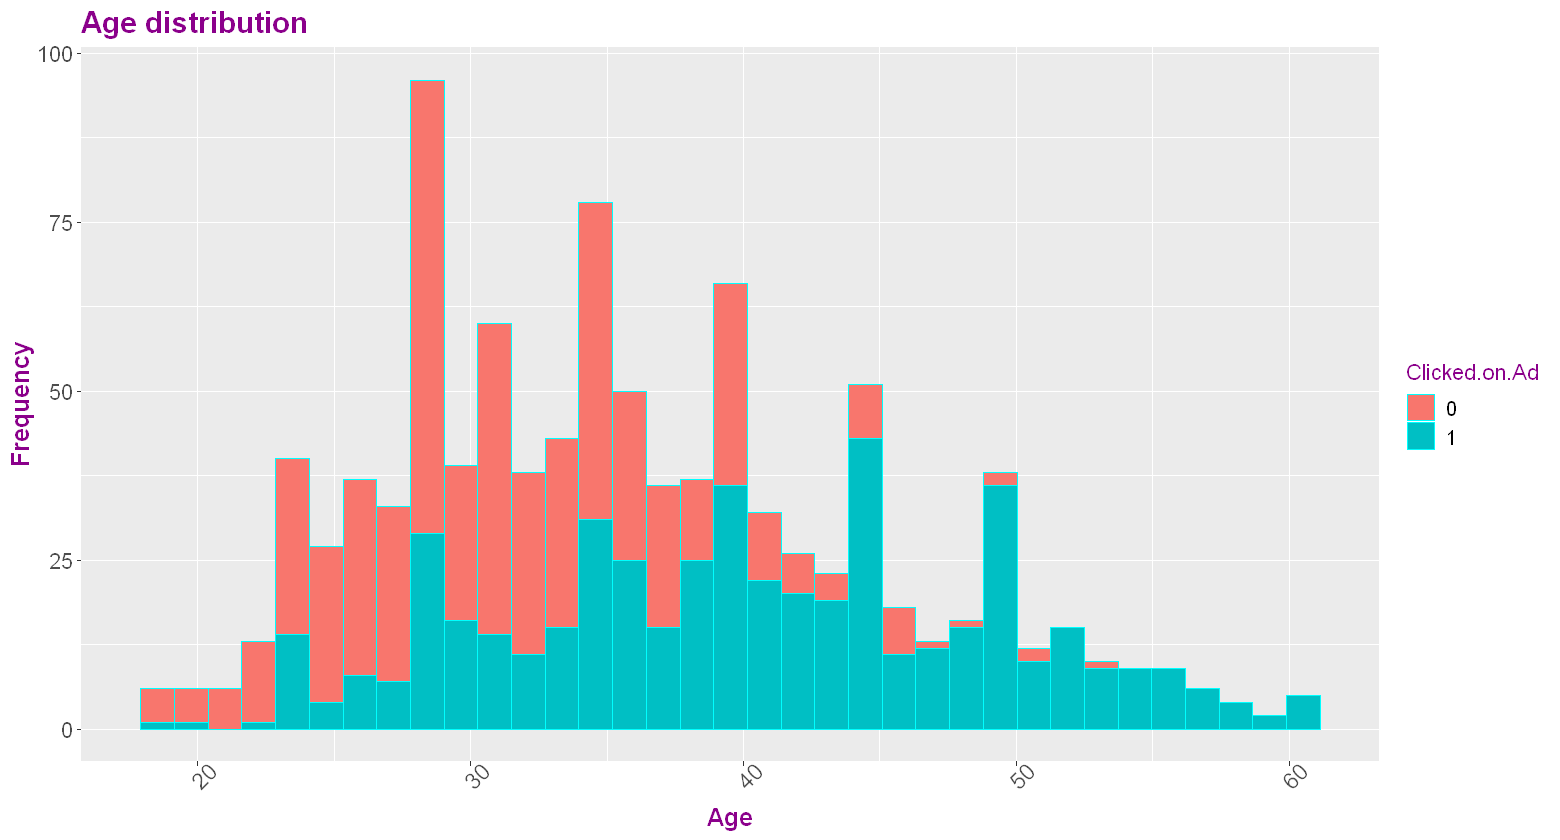

In [27]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df4, aes(x = Age, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Age distribution', x = 'Age', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

**Income**

In [28]:
library (ggplot2)

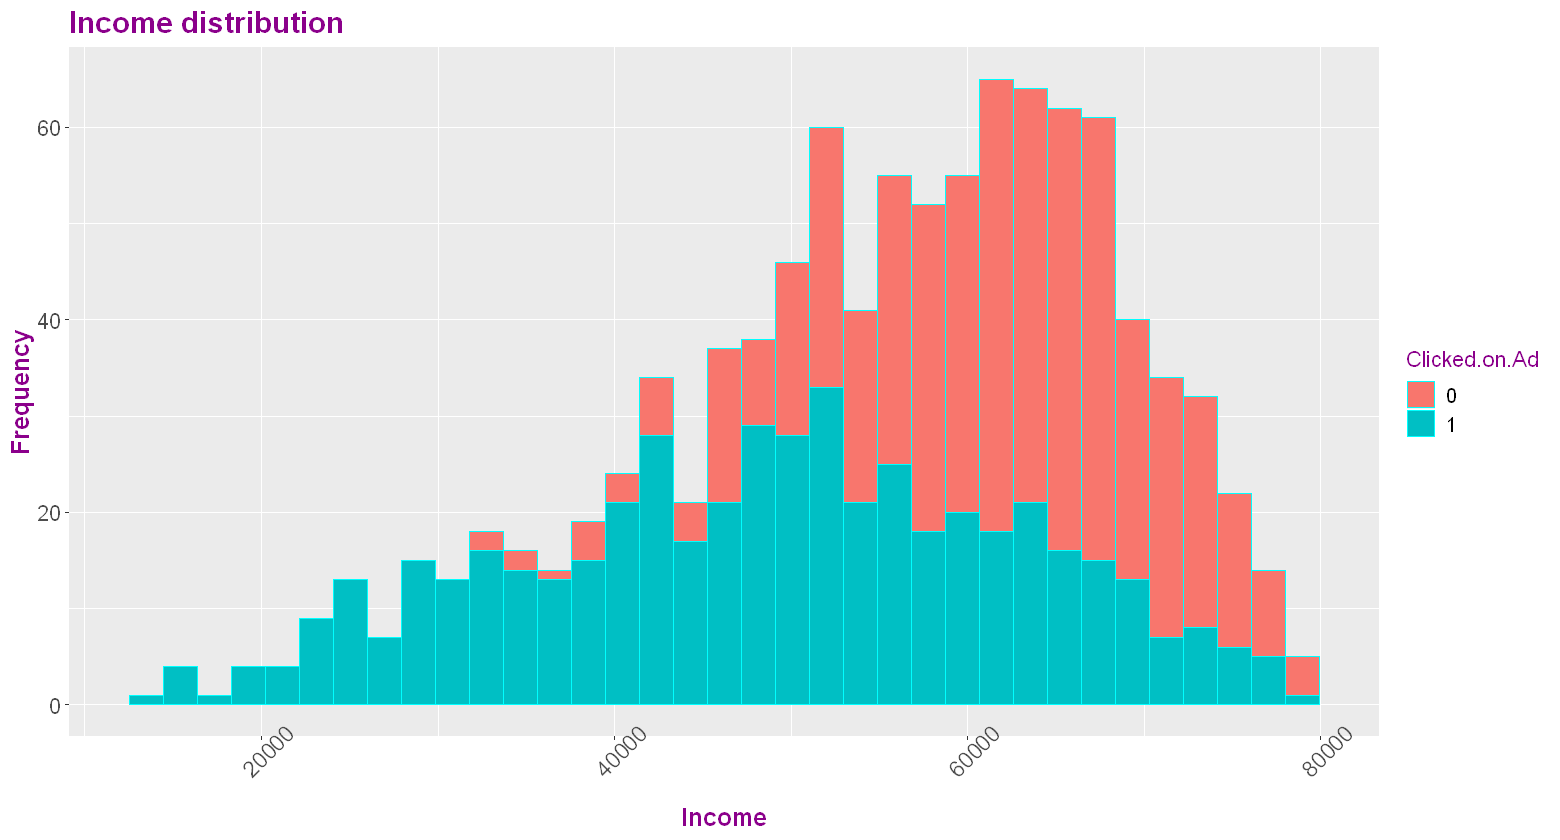

In [29]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df4, aes(x = Area.Income, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Income distribution', x = 'Income', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

**Daily Internet Use**

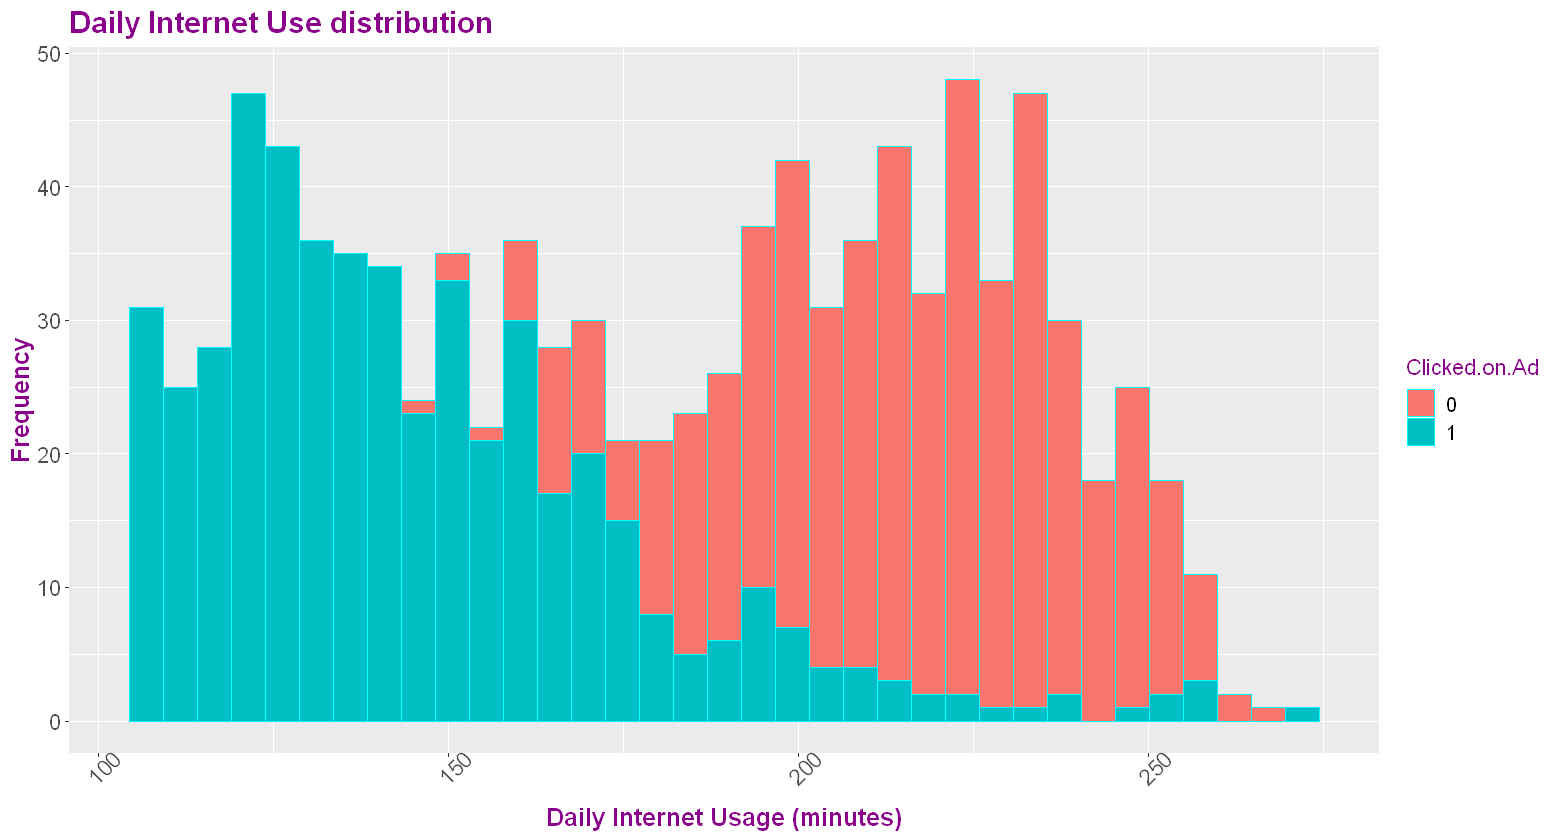

In [30]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df4, aes(x = Daily.Internet.Usage, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Daily Internet Use distribution', x = 'Daily Internet Usage (minutes)', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

**Daily Time Spent on Site**

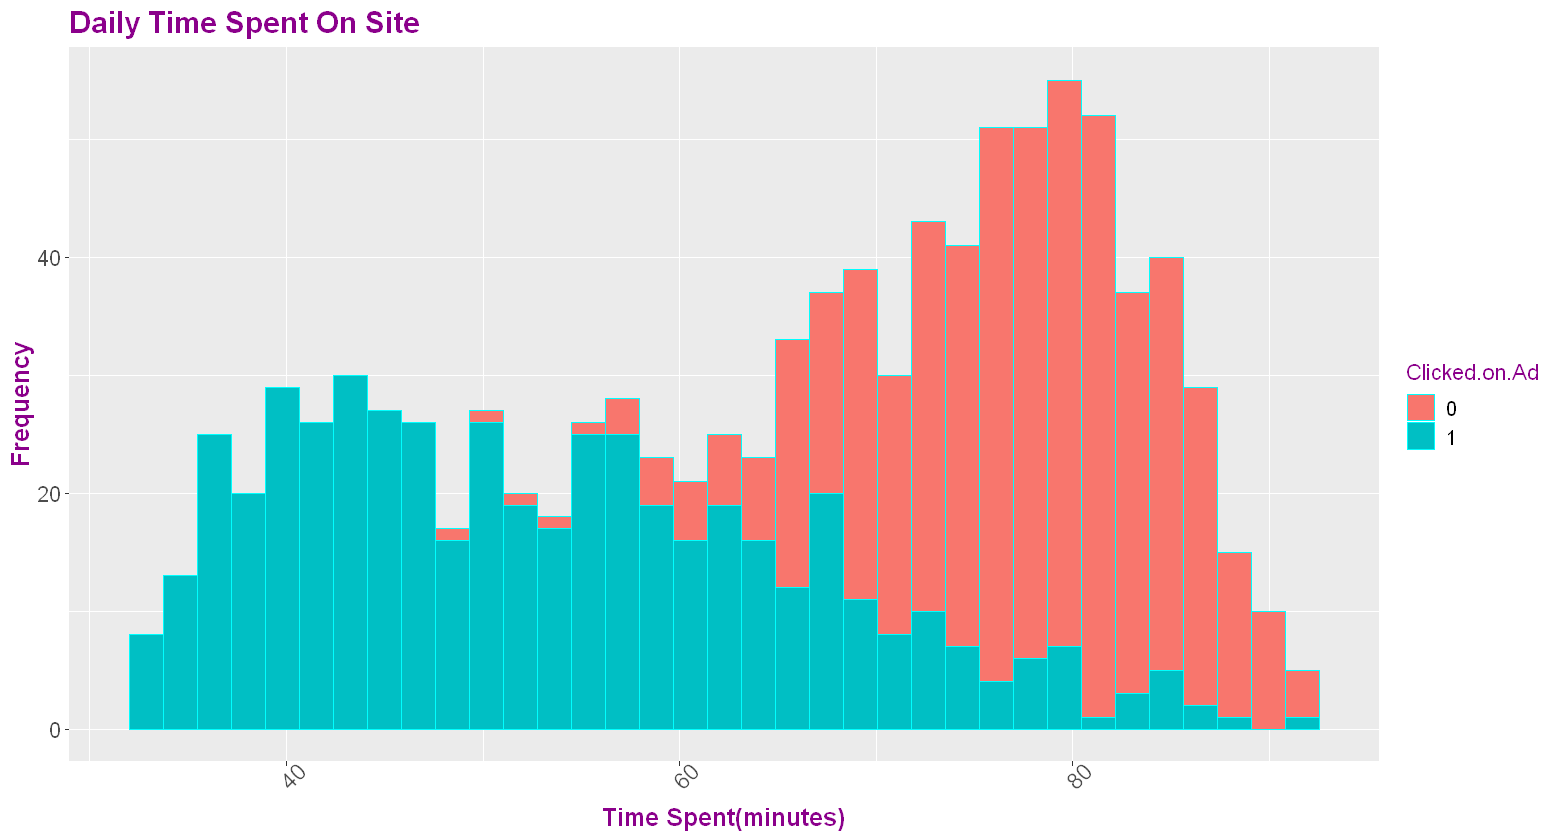

In [31]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df4, aes(x = Daily.Time.Spent.on.Site, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Daily Time Spent On Site', x = 'Time Spent(minutes)', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

**Most popular months for ad clicks**

In [32]:
audience_df5 <- audience_df4

In [33]:
audience_df5$month = as.double(audience_df5$month)

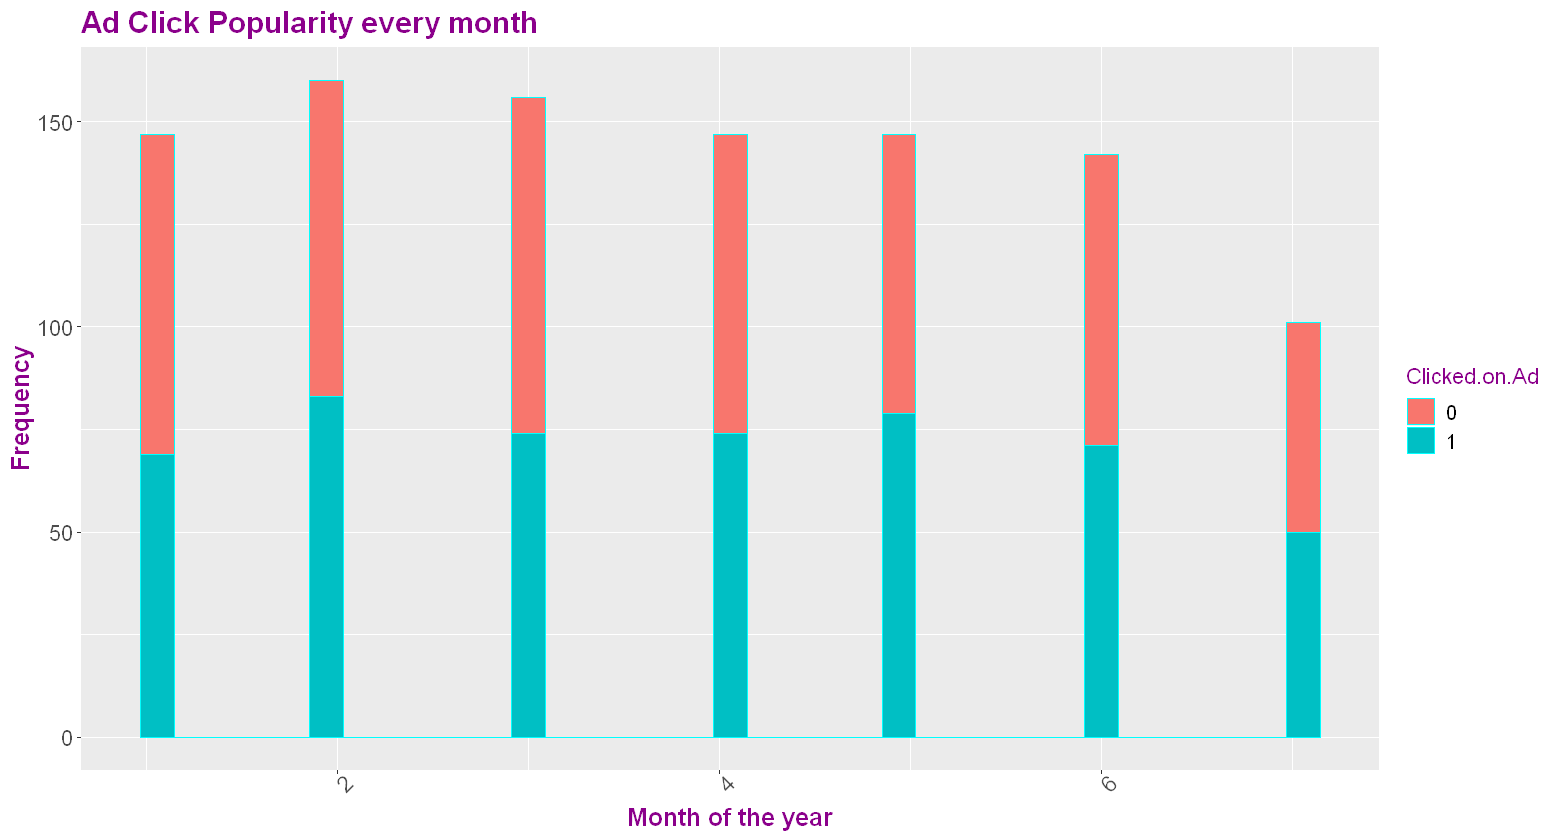

In [34]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df5, aes(x = month, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Ad Click Popularity every month', x = 'Month of the year', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

From the graph, we can see that ad engagement is mostly the same across all months. except maybe July which is slightly lower.

**Most popular hour of day for ad clicks**

In [35]:
audience_df5$hour = as.double(audience_df5$hour)

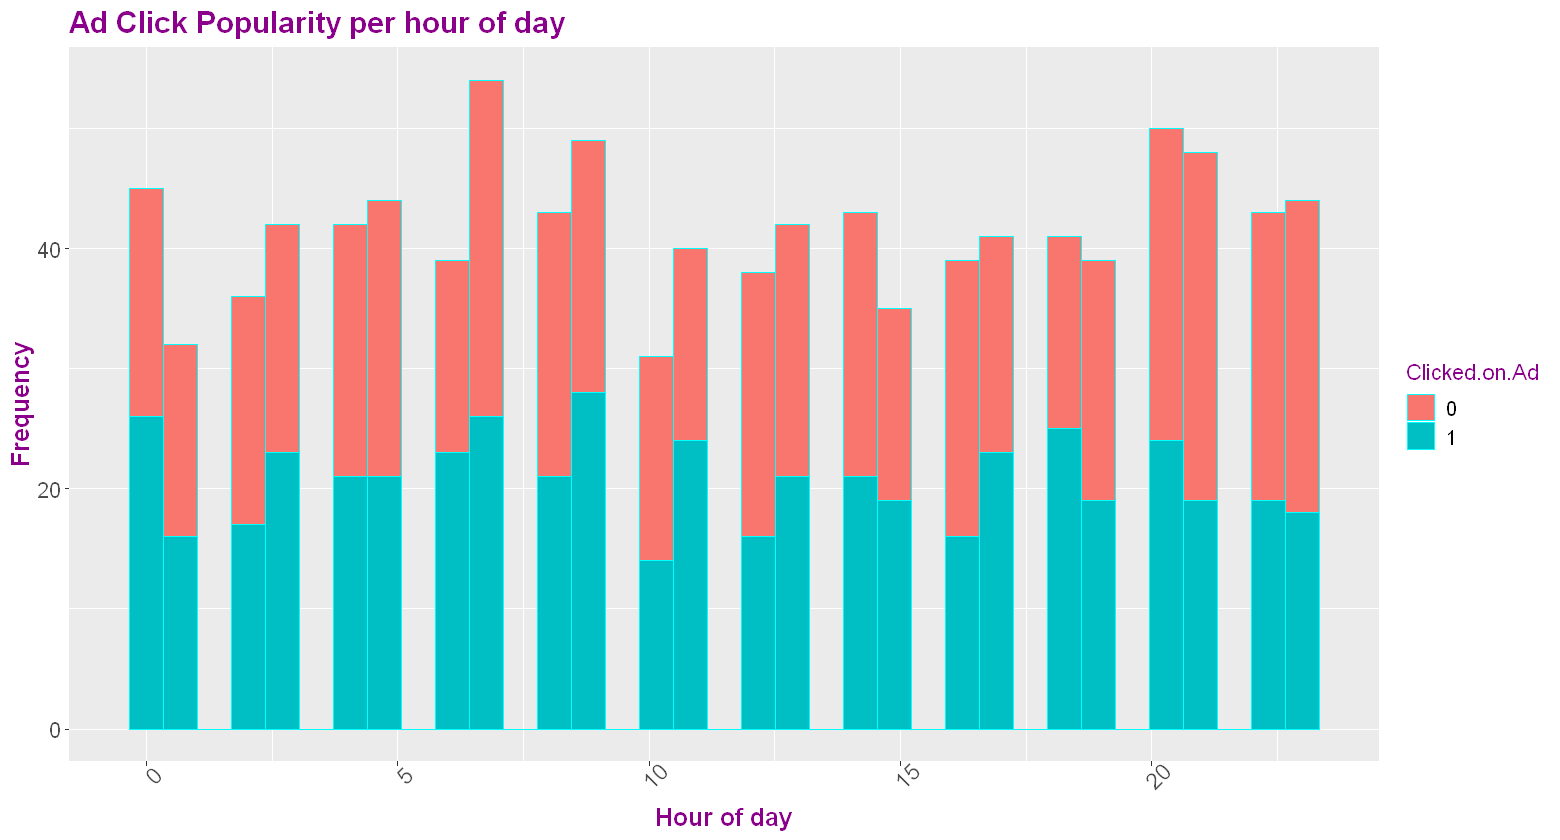

In [36]:
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = audience_df5, aes(x = hour, fill = Clicked.on.Ad))+
    geom_histogram(bins = 35, color = 'cyan') + 
    labs(title = 'Ad Click Popularity per hour of day', x = 'Hour of day', y = 'Frequency', fill = 'Clicked.on.Ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 45),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))

Our client's ad clicks are farly enely distributed across all hours of the day. This is probably because she advertises in many different territories. Nothing to change here. If there were hours that were doing badly, I'd have recommended she optimizes her ad spending to capitalize on the more profitable hours.

***

# Conclusion & Recommendations
Contrary to my first assessment of the data, I found that it was not aprropriate in more ways than one. However, there's a reason I was hired. They shone a light in the sky, and I responded to the Batcall. No complaints here, we made the data work and still got actionable insights in the end!

Here are my recommendations:

The **country** column, which I thought would provide very good data at the start, turned to kind of be a DUD. This is because the user countries are too many (high dimensionality). Perhaps the only recommendation I can give based on this is for her to **significantly** narrow down her target audience. Time and time again, that has proven to improve user engagement in the Social Media space. right now her efforts are stretched too thin.

Her total userbase age spans from 19 to 61. However, from our visual tools, we can see that majority of the users that click on ads (Ad Clicks are our endgame) are in the late 30s to early 60s age bracket. I would recommend to our client that she selects ads that are more relevant ot this demographic. 

Her users also skew more on the high income end of the spectrum. This was expected considering her age demographic data. Perhaps she could maximize revenue gain from her advertising by raising the cost of the courses, or introducing tiered lesson levels structured in a way that users are more likely to select the courses that cost more. She should be able to do this without losing users. Her demographicis older and has more spending money, and are more likely to value/ assess quantity before gasping at higher prices.

Another key takeaway is that the overwhelming majority of users that click on ads spend less time on the site. They also spend less time on the internet (*Daily.Internet.Usage* feature). Based on that, it would be in our client's best interests to employ methods that capture the attention of her users quickly!  She can use floating CTA (Call to Action) buttons, mentions of the ads in the blog content (assuming the content and ads are related), A/B testing with different designs to see which site layout better "guides" users towards ad banners.

*********
# ---------ADDITIONAL WEEK 13 MODELING SECTION---------
********

I'd want to use decision trees (more specifically **Random Forest**) for this model, due to their resilience and versatility in application.

For the purposes of optimization, I want to run the model using 5 different versions of the dataframe, that are making use of varied categories for analysis. The 5 versions are detailed here:
* Baseline version (modelset1) - time on site, daily net use, income, age, month, hour, clicked on ad 
* modelset2 - time on site, daily net use, income, age, clicked on ad 
* modelset3 - income, age, month, hour, clicked on ad  
* modelset4 - daily net use, income, age, month, hour, clicked on ad 
* modelset5 - time on site,income, age, month, hour, clicked on ad 
.
.
Here are some justifications for why I designed the datasets like I did:

**Set1** is the baseline and just includes ALL DIMENSIONS

**Set2** has the month and specific hour of the users removed because they seem so subjective. I feel like this metric should have little bearing on helping predict a user's activity. I feel like people are very different and can do the same things at different times of day/ year influenced by schedules, preferences, income etc. That's what this test is for. In fact, now as I mention it, I'd want to get more data for this retaill site, and perform different analyses based on varying income strata. I think we'd see some very interesting variations, but we'll save that for another day.

**Set3** has all the net use metrics removed. I expect this to drastically affect our accuracy (negatively), but let's wait and see the results. This dataset is also serving as a control for the next 2 sets. We're scientists! We're gonna do this the right way, no stone unturned.

**Set4** and **Set5** have either internet use metric removed. I feel that it's important to see how each affects our accuracy because they're collected very differently. Getting a user's daily internet usage is significantly more difficult to do, it would involve VERY obtrusive tracking of our users AWAY from the website. This flies in the face of the very same user privacy protection rights I strive to protect.  Of course, a different way to get this is to survey the users, but based on research and experience, I cannot think of an organic way to integrate this into the user experience. Also, the information surveyed would be based on recall and is likely to be inaccurate.       

In [37]:
audience_df6 <- audience_df5

In [38]:
modelset1 <- subset(audience_df6, select = c(Daily.Time.Spent.on.Site, Age, Area.Income, Daily.Internet.Usage, Male, month, hour, Clicked.on.Ad))

In [39]:
head(modelset1)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,month,hour,Clicked.on.Ad
68.95,35,61833.90,256.09,0,3,0,0
80.23,31,68441.85,193.77,1,4,1,0
69.47,26,59785.94,236.50,0,3,20,0
74.15,29,54806.18,245.89,1,1,2,0
68.37,35,73889.99,225.58,0,6,3,0
59.99,23,59761.56,226.74,1,5,14,0


In [40]:
modelset2 <- subset(modelset1, select = -c(month, hour))

In [41]:
modelset3 <- subset(modelset1, select = -c(Daily.Time.Spent.on.Site, Daily.Internet.Usage))

In [42]:
modelset4 <- subset(modelset1, select = -c(Daily.Time.Spent.on.Site))

In [43]:
modelset5 <- subset(modelset1, select = -c(Daily.Internet.Usage))

So far so good...



In [44]:
head(modelset1)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,month,hour,Clicked.on.Ad
68.95,35,61833.90,256.09,0,3,0,0
80.23,31,68441.85,193.77,1,4,1,0
69.47,26,59785.94,236.50,0,3,20,0
74.15,29,54806.18,245.89,1,1,2,0
68.37,35,73889.99,225.58,0,6,3,0
59.99,23,59761.56,226.74,1,5,14,0


Confirming that the *Clicked.on.Ad* feature is of the type factor. In R, we use factor for categorical variables.

In [46]:
sapply(modelset1, class)

Daily.Time.Spent.on.Site                      Age              Area.Income 
               "numeric"                "integer"                "numeric" 
    Daily.Internet.Usage                     Male                    month 
               "numeric"                "integer"                "numeric" 
                    hour            Clicked.on.Ad 
               "numeric"                 "factor"

Confirmed...

We can now proceed to split the dataset into train and test portions.

In [48]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [50]:
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [54]:
install.packages('caTools')


Installing package into 'C:/Users/ma1oba/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'bitops'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ma1oba\AppData\Local\Temp\RtmpAXXRog\downloaded_packages


In [55]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [57]:
sample = sample.split(modelset1$Clicked.on.Ad, SplitRatio = .75)
train = subset(modelset1, sample == TRUE)
test  = subset(modelset1, sample == FALSE)
dim(train)
dim(test)

[1] 750   8

[1] 250   8

Initializing the instance of *randomForest()* to train the model.

Note to self: In R, fitting is done automatically for most models.

In [59]:
rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=train
)

Now, we use our model to predict whether the people in our testing set will click on ads or not.

*********
**NOTE:** In the cell below, # newdata specifies the first place to look for explanatory variables to be used for prediction. Some considerable attempts are made to match up the columns in newdata to those used for fitting, for example that they are of comparable types and that any factors have the same level set in the same order (or can be transformed to be so).
**********

In [60]:
pred = predict(rf, newdata=test[-8])

Since this is a classification problem, we use a confusion matrix to evaluate the performance of our model. Recall that values on the diagonal correspond to true positives and true negatives (correct predictions) whereas the others correspond to false positives and false negatives.

In [62]:
cm = table(test[,8], pred)
cm

   pred
      0   1
  0 120   5
  1   5 120

In [63]:
accuracy_Test <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy for test', accuracy_Test))

[1] "Accuracy for test 0.96"


**96 percent for this model is fantastic**

Let's see what it's like for the other test models...


## modelset2

In [69]:
sample = sample.split(modelset2$Clicked.on.Ad, SplitRatio = .75)
train = subset(modelset2, sample == TRUE)
test  = subset(modelset2, sample == FALSE)
dim(train)
dim(test)

[1] 750   6

[1] 250   6

In [70]:
rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=train
)

pred = predict(rf, newdata=test[-6])

In [71]:
cm = table(test[,6], pred)
cm

   pred
      0   1
  0 124   1
  1   2 123

In [72]:
accuracy_Test <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy for model set 2', accuracy_Test))

[1] "Accuracy for model set 2 0.988"


## modelset3

In [74]:
sample = sample.split(modelset3$Clicked.on.Ad, SplitRatio = .75)
train = subset(modelset3, sample == TRUE)
test  = subset(modelset3, sample == FALSE)
dim(train)
dim(test)

[1] 750   6

[1] 250   6

In [75]:
rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=train
)

pred = predict(rf, newdata=test[-6])

In [79]:
cm = table(test[,6], pred)
cm

   pred
      0   1
  0 122   3
  1   4 121

In [80]:
accuracy_Test <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy for model set 3', accuracy_Test))

[1] "Accuracy for model set 3 0.972"


## modelset4

In [82]:
sample = sample.split(modelset4$Clicked.on.Ad, SplitRatio = .75)
train = subset(modelset4, sample == TRUE)
test  = subset(modelset4, sample == FALSE)
dim(train)
dim(test)

rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=train
)

pred = predict(rf, newdata=test[-7])

cm = table(test[,7], pred)
cm

accuracy_Test <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy for model set 4', accuracy_Test))

[1] 750   7

[1] 250   7

   pred
      0   1
  0 119   6
  1  12 113

[1] "Accuracy for model set 2 0.928"


## modelset5

In [83]:
sample = sample.split(modelset5$Clicked.on.Ad, SplitRatio = .75)
train = subset(modelset5, sample == TRUE)
test  = subset(modelset5, sample == FALSE)
dim(train)
dim(test)

[1] 750   7

[1] 250   7

In [84]:
rf <- randomForest(
  Clicked.on.Ad ~ .,
  data=train
)

pred = predict(rf, newdata=test[-7])

In [85]:
cm = table(test[,7], pred)
cm

   pred
      0   1
  0 118   7
  1  15 110

In [86]:
accuracy_Test <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy for model set 2', accuracy_Test))

[1] "Accuracy for model set 2 0.912"


# Conclusion after predictive analysis

First, here are the different accuracies for the different test data sets:
* set 1: 96%
* set 2: 98.8%
* set 3: 97.2%
* set 4: 92.8%
* set 5: 91.2%

So our base model (all the parameters included) performed very well.

**Set 2** and **Set 3** have comparable performance. An important detail is the 2% jump in performance from  set 1 to set 2. This jump implies that the month and date data may be no more than additional noise that 'scrambles' our accuracy, much the same way noise on a photograph reduces visibility.

**Set 3** was very important as far as aligning our modeling goals with data privacy ethics. I'm glad to see that the model still performs well (97.2%) without the intrusive data (total browsing time).  

For **Set 4** and **Set 5**, you would expect that the performance would be comparable to **Set 3** considering they have the internet use attributes that are part of the success in the second set. However, we see a 6% to 7% drop in performance.


# Recommendation

Based on our research and findings, I recommend that our client proceeds with most elements of her data collection strategy. The one change she should make is to cease the collection of users' daily browsing time. It's the altruistic thing to do, but she can even use it as part of her marketing strategy, assuring users that they are not tracked after they leave her site. This would help her stand out from the crowd. 

She can also drop metrics like *Ad.Topic.Line*, *City* and *Country*. They have little bearing on our predictions, and at the same time will significantly save on server-side storage utilization and bandwidth used in transmission of the data. 

